<a href="https://colab.research.google.com/github/SrishtiTyagii/coursework/blob/main/timeseriesanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library and Prepare data

In [75]:
import pandas as pd

# define the dataset
data = {
    'Month': ['Sep-23', 'Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24',
              'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24'],
    'Rent': [6500, 6500, 6500, 6500, 6500, 6500, 6500, 6500, 6500, 6500, 6500, 6500],
    'Water_bill': [100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150],
    'Electricity_bill': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 363],
    'Garbage_bill': [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
    'Monthly_expenses': [35357, 4315, 6089, 7928, 10790, 10282, 8427, 7417, 8896, 7519, 9221, 7487],
    'Total_allowance': [42000, 15000, 15000, 15000, 15000, 19000, 17000, 15000, 15000, 20000, 25000, 15000]
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

* The dataset contains monthly data from September 2023 to August 2024, showing expenses for rent, water, electricity, garbage, total monthly expenses, and total allowance.

# Data Exploration

In [76]:
# Display first few rows of the data
print(df.head())

    Month  Rent  Water_bill  Electricity_bill  Garbage_bill  Monthly_expenses  \
0  Sep-23  6500         100                 0            25             35357   
1  Oct-23  6500         100                 0            25              4315   
2  Nov-23  6500         100                 0            25              6089   
3  Dec-23  6500         100                 0            25              7928   
4  Jan-24  6500         100                 0            25             10790   

   Total_allowance  
0            42000  
1            15000  
2            15000  
3            15000  
4            15000  


* The output shows the first five rows of the DataFrame, which lists these columns and their corresponding values for each month.

In [77]:
# Check the data types and structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             12 non-null     object
 1   Rent              12 non-null     int64 
 2   Water_bill        12 non-null     int64 
 3   Electricity_bill  12 non-null     int64 
 4   Garbage_bill      12 non-null     int64 
 5   Monthly_expenses  12 non-null     int64 
 6   Total_allowance   12 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 800.0+ bytes
None


* The output indicates there are 12 rows and 7 columns in total. Each column has no missing values (12 non-null), and all columns are integers (int64), except for the 'Month' column, which is a string (object).

In [78]:
# Check summary statistics for numerical columns
print(df.describe())

         Rent  Water_bill  Electricity_bill  Garbage_bill  Monthly_expenses  \
count    12.0   12.000000         12.000000          12.0         12.000000   
mean   6500.0  120.833333         30.250000          25.0      10310.666667   
std       0.0   25.746433        104.789074           0.0       8078.442934   
min    6500.0  100.000000          0.000000          25.0       4315.000000   
25%    6500.0  100.000000          0.000000          25.0       7469.500000   
50%    6500.0  100.000000          0.000000          25.0       8177.500000   
75%    6500.0  150.000000          0.000000          25.0       9486.250000   
max    6500.0  150.000000        363.000000          25.0      35357.000000   

       Total_allowance  
count        12.000000  
mean      19000.000000  
std        7874.007874  
min       15000.000000  
25%       15000.000000  
50%       15000.000000  
75%       19250.000000  
max       42000.000000  


* The mean rent is consistent at 6500 across all months.
* The water bill averages around 120.83, with some variance, as the water bill increases to 150 in later months.
* Electricity shows an average of 30.25 due to a large spike in August 2024, as most months have no electricity bill.
* The monthly expenses have a wide range, with a mean of 10,310.67 and a maximum of 35,357, reflecting some outliers.
* The allowance averages at 19,000 but varies across months with a large standard deviation (7874).


In [79]:
# Convert Month column to datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
print(df['Month'].head())

0   2023-09-01
1   2023-10-01
2   2023-11-01
3   2023-12-01
4   2024-01-01
Name: Month, dtype: datetime64[ns]


* The 'Month' column is successfully converted from a string to a datetime format and displayed. The output shows the first five dates in yyyy-mm-dd format, e.g., 2023-09-01.

In [80]:
# Set the Month column as the index
df.set_index('Month', inplace=True)

# Resample monthly expenses since the data is monthly
print(df[['Rent', 'Water_bill', 'Electricity_bill', 'Garbage_bill', 'Monthly_expenses']].head())

            Rent  Water_bill  Electricity_bill  Garbage_bill  Monthly_expenses
Month                                                                         
2023-09-01  6500         100                 0            25             35357
2023-10-01  6500         100                 0            25              4315
2023-11-01  6500         100                 0            25              6089
2023-12-01  6500         100                 0            25              7928
2024-01-01  6500         100                 0            25             10790


* The DataFrame is reindexed by the 'Month' column, so subsequent operations will use the date as the index.

# Visualizing Monthly Expenses

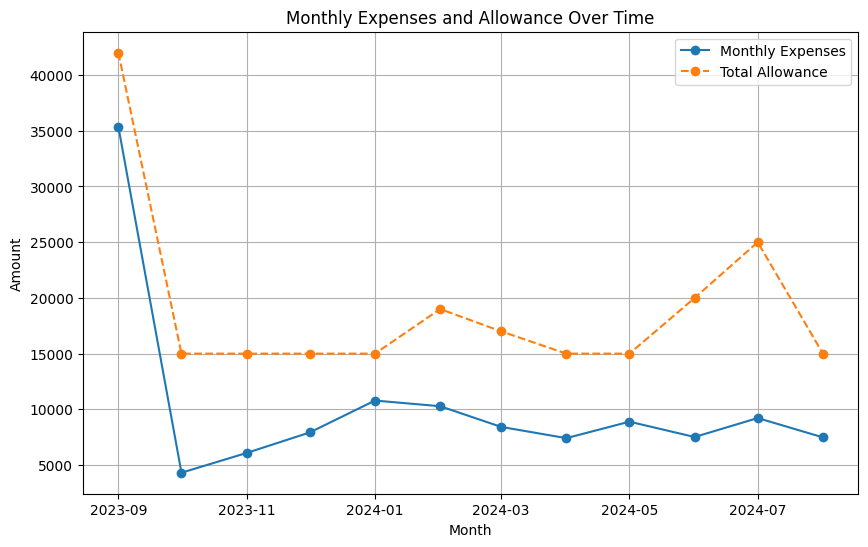

In [81]:
import matplotlib.pyplot as plt

# Plot Monthly Expenses over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Monthly_expenses'], marker='o', label='Monthly Expenses')
plt.plot(df.index, df['Total_allowance'], marker='o', label='Total Allowance', linestyle='--')
plt.title('Monthly Expenses and Allowance Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

* The plotted output shows a comparison between monthly expenses and total allowance.
* You can see a time series graph with expenses and allowance plotted over the 12 months.
* Monthly expenses fluctuate significantly, while total allowance is relatively stable, with some spikes.

<Figure size 1200x700 with 0 Axes>

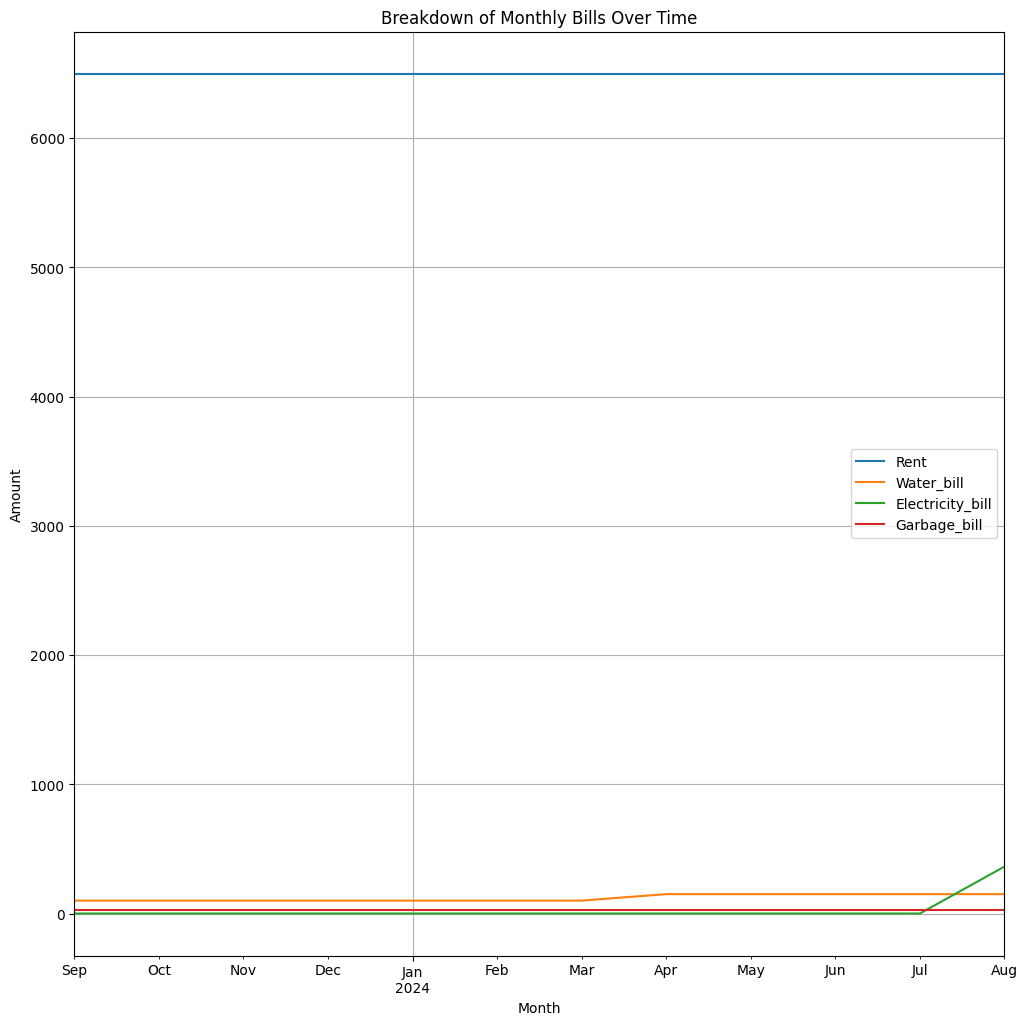

In [82]:
# Plot each bill type over time
plt.figure(figsize=(12, 7))
df[['Rent', 'Water_bill', 'Electricity_bill', 'Garbage_bill']].plot(kind='line', figsize=(12, 12))
plt.title('Breakdown of Monthly Bills Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

* Shows the individual bill components (rent, water, electricity, garbage) over time.
* The rent and garbage bills remain flat, while the water bill increases in later months and electricity spikes only in August 2024.

# Calculating Mean, Median, and Standard Deviation

In [83]:
# Mean, median, and standard deviation for monthly expenses and allowance
mean_expenses = df['Monthly_expenses'].mean()
median_expenses = df['Monthly_expenses'].median()
std_expenses = df['Monthly_expenses'].std()

mean_allowance = df['Total_allowance'].mean()
median_allowance = df['Total_allowance'].median()
std_allowance = df['Total_allowance'].std()

print(f"Mean Monthly Expenses: {mean_expenses}")
print(f"Median Monthly Expenses: {median_expenses}")
print(f"Standard Deviation of Monthly Expenses: {std_expenses}")

print(f"Mean Total Allowance: {mean_allowance}")
print(f"Median Total Allowance: {median_allowance}")
print(f"Standard Deviation of Total Allowance: {std_allowance}")

Mean Monthly Expenses: 10310.666666666666
Median Monthly Expenses: 8177.5
Standard Deviation of Monthly Expenses: 8078.442934280359
Mean Total Allowance: 19000.0
Median Total Allowance: 15000.0
Standard Deviation of Total Allowance: 7874.007874011811


# Moving Average Calculations

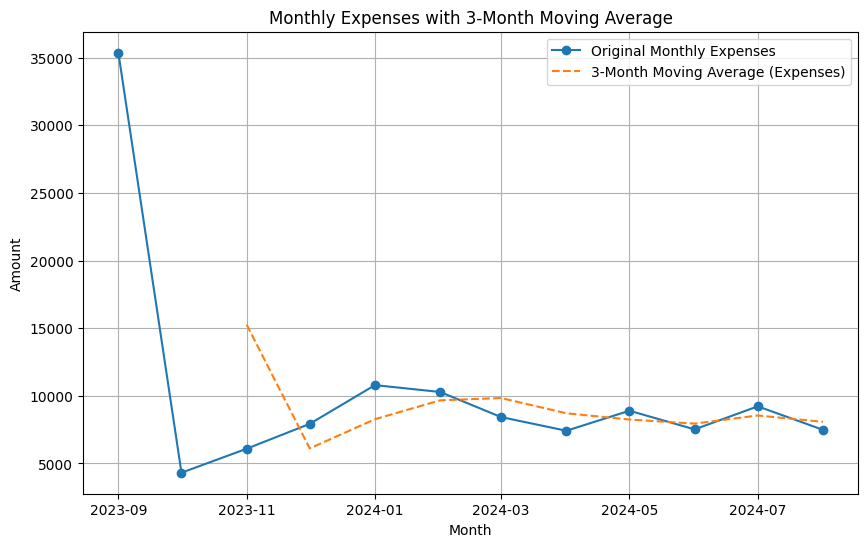

In [84]:
# Calculate a 3-month moving average for Monthly Expenses and Total Allowance
df['3_month_moving_avg_expenses'] = df['Monthly_expenses'].rolling(window=3).mean()
df['3_month_moving_avg_allowance'] = df['Total_allowance'].rolling(window=3).mean()

# Plot original expenses and moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Monthly_expenses'], label='Original Monthly Expenses', marker='o')
plt.plot(df.index, df['3_month_moving_avg_expenses'], label='3-Month Moving Average (Expenses)', linestyle='--')
plt.title('Monthly Expenses with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

* A new column is created for the 3-month moving average of both 'Monthly Expenses' and 'Total Allowance'.
* The moving averages smooth out fluctuations, showing a steadier trend over time.

# Feature Engineering for Time Series

In [85]:
import numpy as np

# Create time-based features (year, month)
df['year'] = df.index.year
df['month'] = df.index.month

# Lag features (e.g., using last month's expenses to predict current month)
df['lag_1_expenses'] = df['Monthly_expenses'].shift(1)
df['lag_2_expenses'] = df['Monthly_expenses'].shift(2)

# Fill any NaN values in lag features
df.fillna(0, inplace=True)

print(df.head(12))

            Rent  Water_bill  Electricity_bill  Garbage_bill  \
Month                                                          
2023-09-01  6500         100                 0            25   
2023-10-01  6500         100                 0            25   
2023-11-01  6500         100                 0            25   
2023-12-01  6500         100                 0            25   
2024-01-01  6500         100                 0            25   
2024-02-01  6500         100                 0            25   
2024-03-01  6500         100                 0            25   
2024-04-01  6500         150                 0            25   
2024-05-01  6500         150                 0            25   
2024-06-01  6500         150                 0            25   
2024-07-01  6500         150                 0            25   
2024-08-01  6500         150               363            25   

            Monthly_expenses  Total_allowance  3_month_moving_avg_expenses  \
Month                    

* New columns are created for 'year', 'month', and lagged versions of 'Monthly Expenses' (lag by 1 and 2 months).
* The output DataFrame includes these features, which are filled with the values from the previous months (for the lag columns).
* Missing values are replaced with 0.

# ARIMA Model for Time Series Forecasting

In [86]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define the ARIMA model (order is chosen arbitrarily, you can fine-tune it)
model = ARIMA(df['Monthly_expenses'], order=(1, 1, 1))

# Fit the ARIMA model
arima_result = model.fit()

# Forecast next 3 months
forecast = arima_result.forecast(steps=3)
print(forecast)

2024-09-01    9701.897460
2024-10-01    9586.337529
2024-11-01    9592.366746
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

* An ARIMA (AutoRegressive Integrated Moving Average) model is fitted to the 'Monthly Expenses' data to forecast the next three months.
* September 2024: 9701.9 | October 2024: 9586.34 | November 2024: 9592.37

# Fine-tuning ARIMA with ACF and PACF Plots

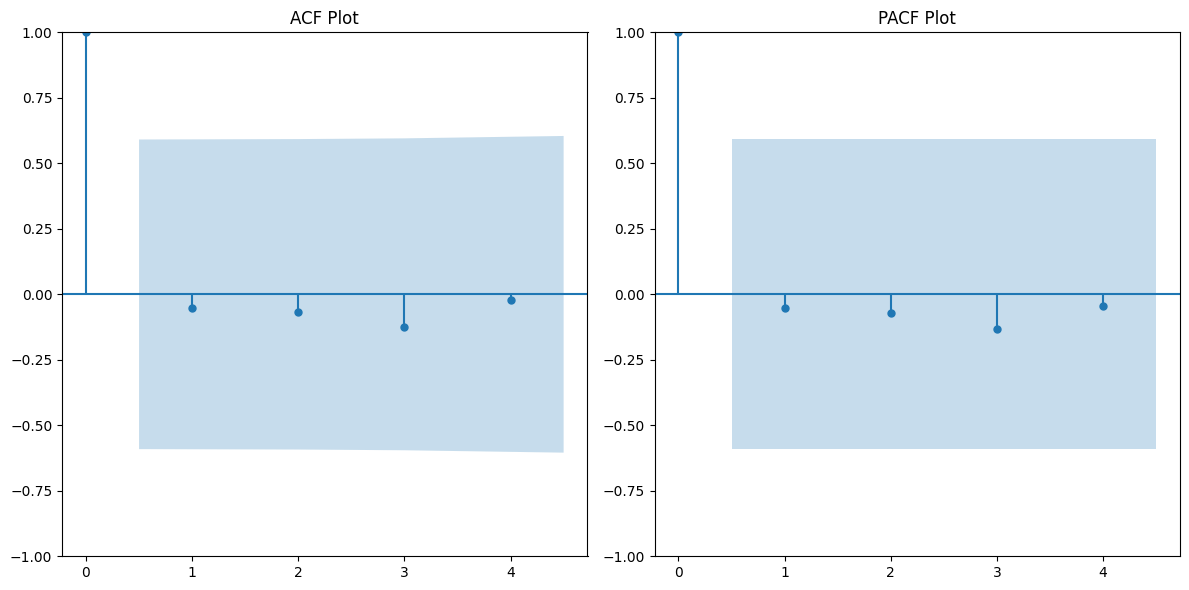

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)
plot_acf(df['Monthly_expenses'].diff().dropna(), ax=plt.gca(), lags=4)
plt.title('ACF Plot')

# PACF Plot
plt.subplot(122)
plot_pacf(df['Monthly_expenses'].diff().dropna(), ax=plt.gca(), lags=4)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


* The AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots are used to help determine the parameters (p, q) for the ARIMA model.
* The ACF plot shows the correlation between a series and its lagged values, while the PACF plot shows the partial correlations.
* These are visualized but not further analyzed here due to small dataset.


# Grid Search for Optimal ARIMA Order

In [88]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq_combinations = list(itertools.product(p, d, q))

# Create a DataFrame to store the results
results = []

# Perform a grid search over all possible combinations of p, d, q
for pdq in pdq_combinations:
    try:
        model = ARIMA(df['Monthly_expenses'], order=pdq)
        result = model.fit()
        results.append((pdq, result.aic))
    except:
        continue

# Convert the results to a DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['pdq', 'AIC']).sort_values(by='AIC')

# Print the top 5 models with the lowest AIC
print(results_df.head())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

          pdq         AIC
19  (2, 0, 1)   10.000000
7   (0, 2, 1)  184.014553
16  (1, 2, 1)  184.622391
25  (2, 2, 1)  185.953534
17  (1, 2, 2)  188.014642


* A grid search over different combinations of (p, d, q) is performed to find the best ARIMA model based on the Akaike Information Criterion (AIC).
* The top 5 models with the lowest AIC are printed, indicating which combinations of parameters provide the best model fit.

# Final ARIMA Model and Forecast

In [89]:
# Select the best (p, d, q) based on AIC
best_pdq = results_df.iloc[0]['pdq']
print(f"Best ARIMA model order: {best_pdq}")

# Fit the ARIMA model with the best order
best_model = ARIMA(df['Monthly_expenses'], order=best_pdq).fit()

# Print model summary
print(best_model.summary())

Best ARIMA model order: (2, 0, 1)
                               SARIMAX Results                                
Dep. Variable:       Monthly_expenses   No. Observations:                   12
Model:                 ARIMA(2, 0, 1)   Log Likelihood                   0.000
Date:                Sun, 15 Sep 2024   AIC                             10.000
Time:                        05:44:59   BIC                             12.425
Sample:                    09-01-2023   HQIC                             9.102
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9183.5561         -0       -inf      0.000    9183.556    9183.556
ar.L1      -2.787e-06   5.42e-09   -514.164      0.000    -2.8e-06   -2.78e-06
ar.L2          1.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3014: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.10/dist-packag

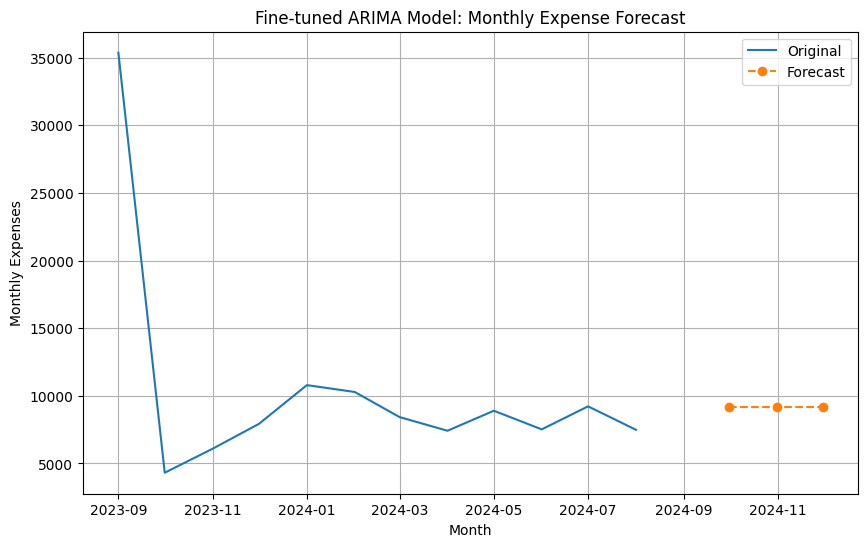

In [90]:
# Forecast the next 3 months
forecast = best_model.forecast(steps=3)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Monthly_expenses'], label='Original')
plt.plot(pd.date_range(start=df.index[-1], periods=4, freq='M')[1:], forecast, label='Forecast', linestyle='--', marker='o')
plt.title('Fine-tuned ARIMA Model: Monthly Expense Forecast')
plt.xlabel('Month')
plt.ylabel('Monthly Expenses')
plt.legend()
plt.grid(True)
plt.show()